# DESENVOLVIMENTO E EXECUÇÃO DE PROJETOS DE SOFTWARE 2022.2

Docente: Ryan Ribeiro De Azevedo

Dicente: Thiago Fabricio de Oliveira

# Exercicio 01

In [ ]:
import librosa

# Carregar o áudio
audio_path = "teste_testado.wav"
audio, sr = librosa.load(audio_path)

In [ ]:
import IPython.display as ipd

# Reproduzir o áudio
ipd.Audio(audio_path)

In [ ]:

import matplotlib.pyplot as plt
import librosa.display

# Plotar o áudio
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio, sr=sr)
plt.title('Forma de onda do áudio')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:

# Obter a taxa de amostragem
sampling_rate = sr

# Calcular a duração do áudio
duration = len(audio) / sr

# Imprimir os resultados
print("Taxa de amostragem: {} Hz".format(sampling_rate))
print("Duração do áudio: {:.2f} segundos".format(duration))

In [ ]:
# Normalização
normalized_audio = librosa.util.normalize(audio)

# Remoção de silêncio
trimmed_audio, _ = librosa.effects.trim(normalized_audio, top_db=20)

# Visualização antes e depois do pré-processamento
plt.figure(figsize=(12, 6))

# Áudio original
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Áudio original')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

# Áudio pré-processado
plt.subplot(2, 1, 2)
plt.plot(trimmed_audio)
plt.title('Áudio pré-processado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [ ]:
import sounddevice as sd

sd.play(audio, sr)
sd.wait()

In [ ]:
sd.play(trimmed_audio, sr)
sd.wait()

In [ ]:
# Calcular o espectrograma
spectrogram = librosa.stft(audio)

# Converter para escala de decibéis
spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))

# Plotar o espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

In [ ]:
import numpy as np

# Calcular o espectrograma
spectrogram = np.abs(librosa.stft(trimmed_audio))

# Calcular o mel spectrograma
mel_spectrogram = librosa.feature.melspectrogram(y=trimmed_audio, sr=sr)

# Calcular os coeficientes MFCC
mfcc = librosa.feature.mfcc(y=trimmed_audio, sr=sr)

# Calcular o contraste espectral
spectral_contrast = librosa.feature.spectral_contrast(y=trimmed_audio, sr=sr)

# Calcular o rolloff espectral
rolloff = librosa.feature.spectral_rolloff(y=trimmed_audio, sr=sr)

# Calcular a tonalidade
tonnetz = librosa.feature.tonnetz(y=trimmed_audio, sr=sr)

# Extrair o chroma
chroma = librosa.feature.chroma_stft(y=trimmed_audio, sr=sr)

# Exibir as dimensões das características extraídas
print('Dimensões das características:')
print('Espectrograma:', spectrogram.shape)
print('Mel Spectrograma:', mel_spectrogram.shape)
print('MFCC:', mfcc.shape)
print('Contraste Espectral:', spectral_contrast.shape)
print('Rolloff Espectral:', rolloff.shape)
print('Tonalidade:', tonnetz.shape)
print("Chroma:", chroma.shape)

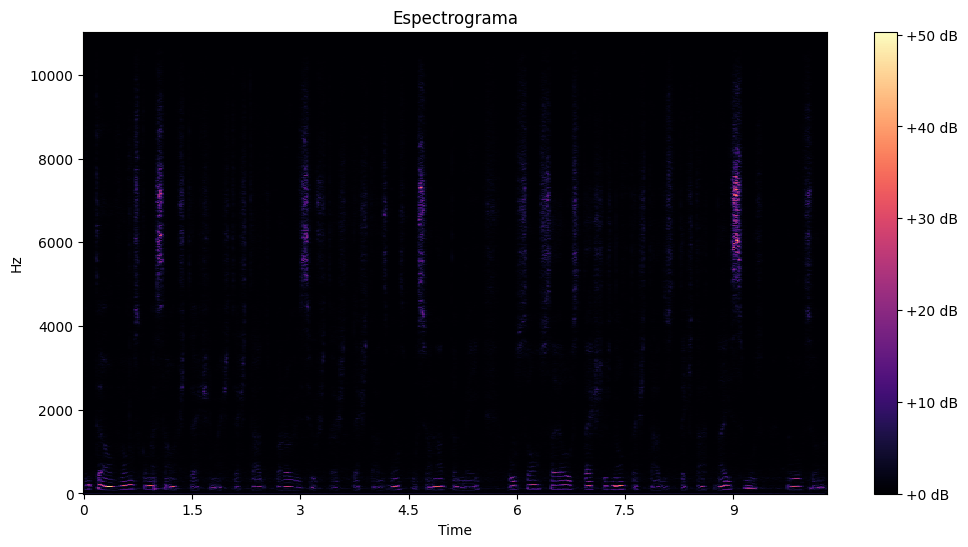

In [22]:
# Plotar o espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.show()

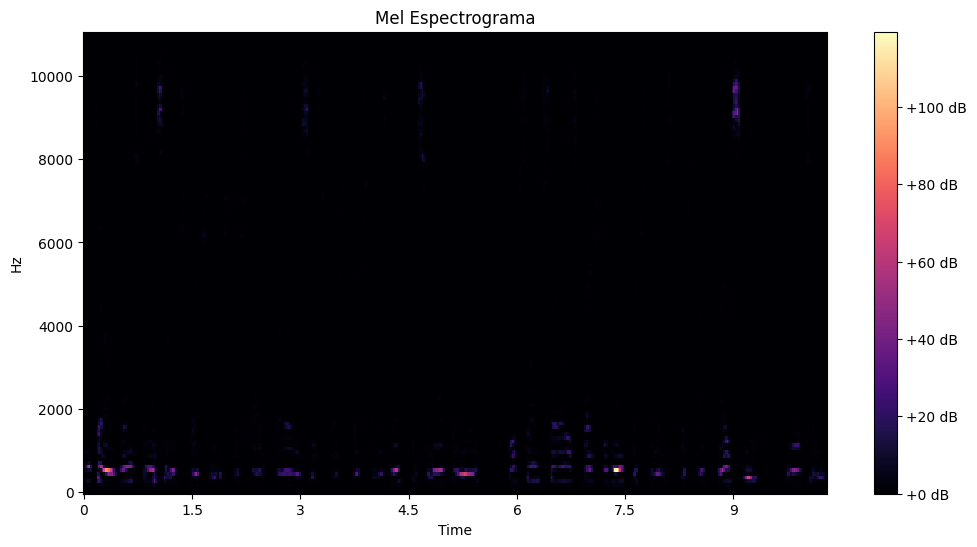

In [23]:
# Plotar o mel spectrograma

plt.figure(figsize=(12, 6))
librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Espectrograma')
plt.show()

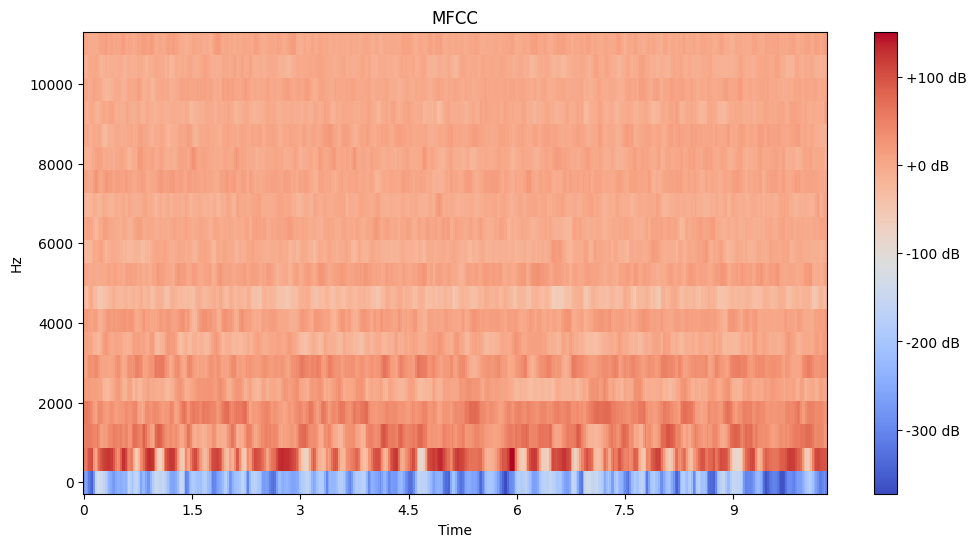

In [24]:
# Plotar os coeficientes MFCC

plt.figure(figsize=(12, 6))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.show()